In [196]:
import warnings
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.common import SettingWithCopyWarning

In [197]:
arquivo_isp = 'C:\\Temp\\SeguracaoPublica\\BaseDPEvolucaoMensalCisp.csv'

dfISP = pd.read_csv(arquivo_isp
                    , sep=';'
                    , encoding='latin-1'
                    , low_memory=False
                    , usecols=(1,2,4,38)
                    , names=['NumMes'
                             ,'NumAno'
                             ,'NomRegiao'
                             ,'NumFurtoCelular']
                    ,dtype={'NumMes':'int64'
                            ,'NumAno':'int64'
                            ,'NomRegiao':'int64'
                            ,'NumFurtoCelular':'int64'
                           }
                    ,skiprows=1
                   ,header=None)

dfISP['TpoCrime'] ='Furto Celular'

dfISPFurtoCelular = dfISP[(dfISP['NumAno'].isin([2018,2019,2020,2021,2022])) 
      & (dfISP['NumMes'].isin([1,2,3,4,5,6,7,8])) 
      & (dfISP['NomRegiao'] == 5)].groupby(['NumAno'
                                            ,'TpoCrime']
                                           ,as_index=False).agg(Qtd=('NumFurtoCelular'
                                                                                  ,'sum'))



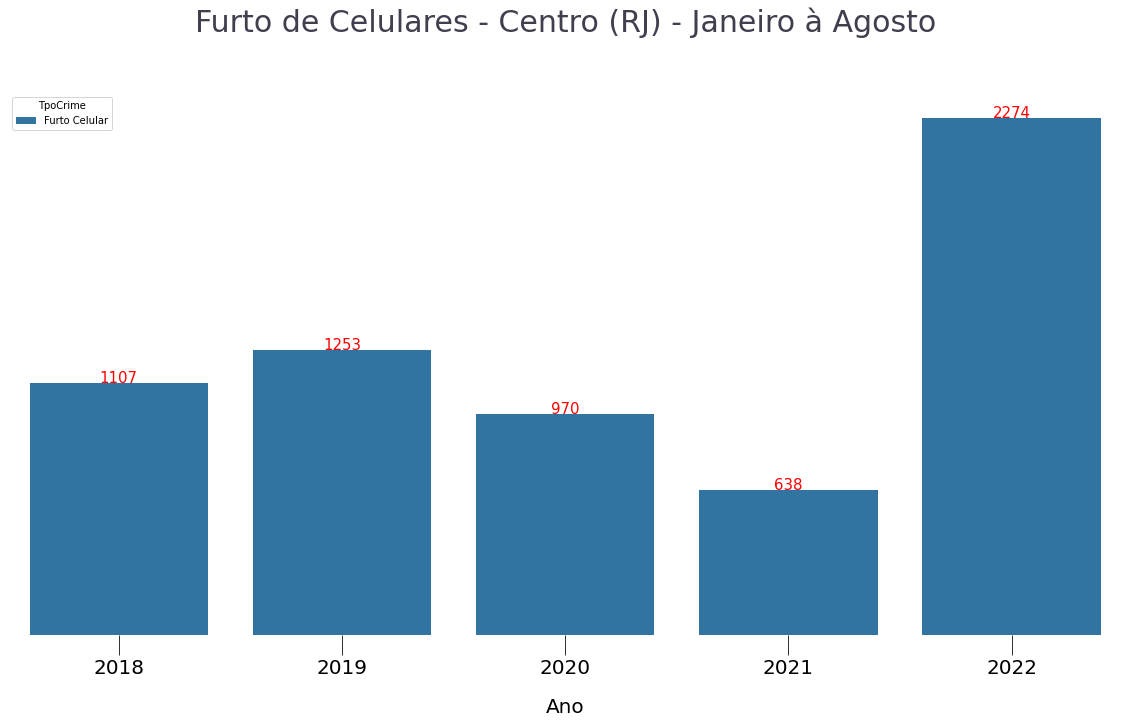

In [198]:
# GERAÇÃO DO GRÁFICO

#criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(  x = dfISPFurtoCelular['NumAno']
            , y = dfISPFurtoCelular['Qtd']
            , hue = dfISPFurtoCelular['TpoCrime']
            , hue_order=dfISPFurtoCelular['TpoCrime'].unique()
           )

#modificação do fundo
ax.set_frame_on(False)

#adicionando um título
ax.set_title('Furto de Celulares - Centro (RJ) - Janeiro à Agosto',loc='center',pad=60,fontdict={'fontsize':30},color='#3f3f4e')

#retirando o eixo y
ax.get_yaxis().set_visible(False)

#retirnado os ticks do eixo x
ax.tick_params(axis='x',length=20,labelsize=20,colors='black')

#ajustando o título do gráfico
ax.set_xlabel('Ano',labelpad=20,fontdict={'fontsize':20},color='black')

for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height()+0.05,
          '{:.0f}'.format(float(retangulo.get_height())).replace(',','.'),
          ha ='center',
          fontsize=15,
          color='red')
    
#plotando o gráfico
plt.show()

In [199]:
#dfISPFurtoCelular.pivot(index=['TpoCrime'], columns=['NumAno'], values=['Qtd']).fillna(0).reset_index()

dfISPFurtoCelular['PercEvolucao'] = dfISPFurtoCelular['Qtd'].pct_change()

In [200]:
dfISPFurtoCelular['PercEvolucao'].fillna(0,inplace=True)

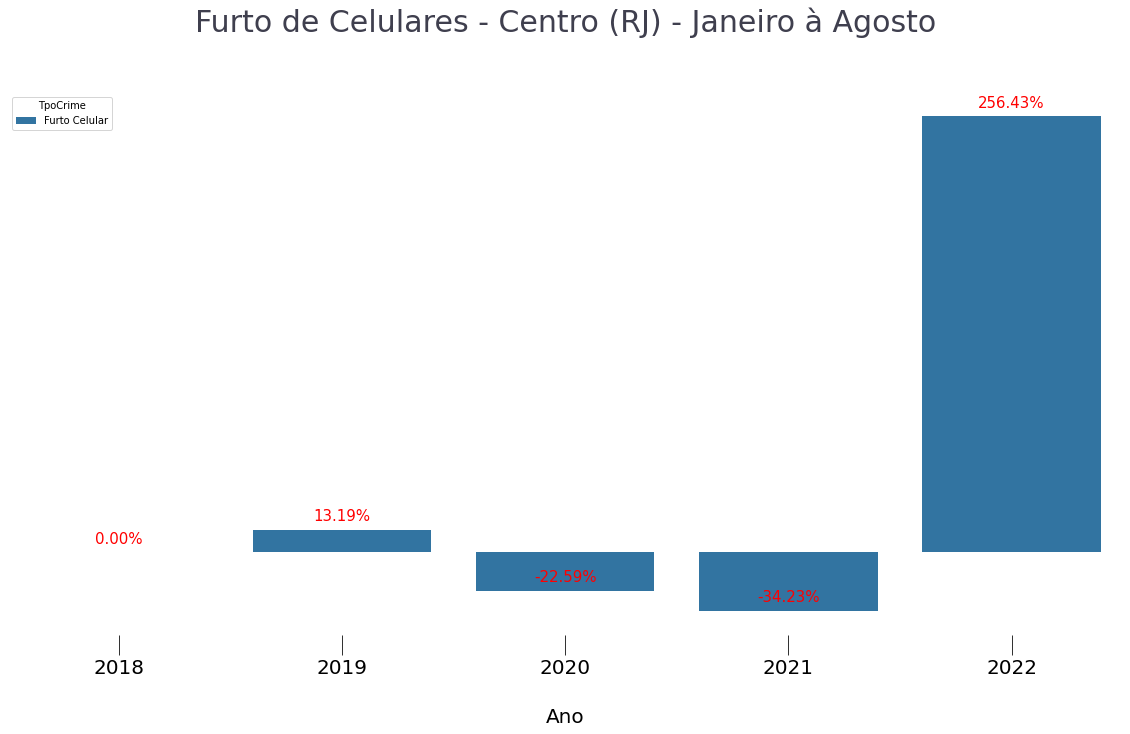

In [201]:
# GERAÇÃO DO GRÁFICO

#criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(  x = dfISPFurtoCelular['NumAno']
            , y = dfISPFurtoCelular['PercEvolucao']
            , hue = dfISPFurtoCelular['TpoCrime']
            , hue_order=dfISPFurtoCelular['TpoCrime'].unique()
           )

#modificação do fundo
ax.set_frame_on(False)

#adicionando um título
ax.set_title('Furto de Celulares - Centro (RJ) - Janeiro à Agosto',loc='center',pad=60,fontdict={'fontsize':30},color='#3f3f4e')

#retirando o eixo y
ax.get_yaxis().set_visible(False)

#retirnado os ticks do eixo x
ax.tick_params(axis='x',length=20,labelsize=20,colors='black')

#ajustando o título do gráfico
ax.set_xlabel('Ano',labelpad=30,fontdict={'fontsize':20},color='black')

for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height()+0.05,
          str('{:.2f}'.format(float(retangulo.get_height())*100).replace(',','.'))+'%',
          ha ='center',
          fontsize=15,
          color='red')
    
#plotando o gráfico
plt.show()